In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("AirPassengers.csv")

In [4]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data = pd.read_csv("AirPassengers.csv", parse_dates=[0], index_col = "Month")
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
data.rename({"#Passengers": "Passengers"}, axis=1, inplace=True)

In [8]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Basic Checks

In [10]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
data.isnull().sum()

Passengers    0
dtype: int64

In [12]:
data.duplicated().sum()

26

# EDA

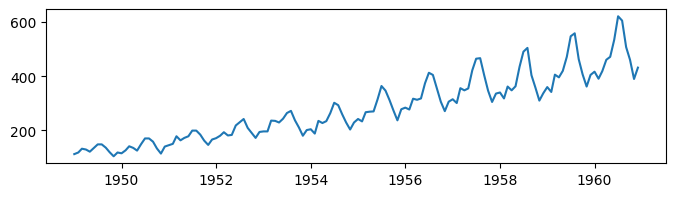

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
plt.plot(data)
plt.show()

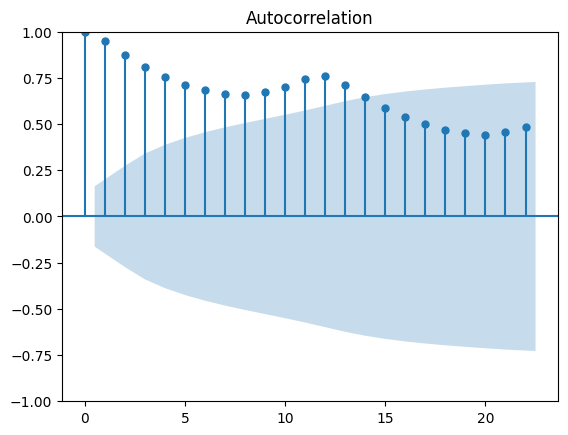

In [15]:
# Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()
# data is not stationary

In [16]:
# ADfuller Test to check stationary 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Passengers, autolag="AIC")
print(dftest)
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations Used for ADF Regression and critical values Calculation: ", dftest[3])
print("5. Critical Values : ", dftest[4])
# p-value<0.05 or ADF < Critical values --> data is stationary

(0.8153688792060352, 0.9918802434376408, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
1. ADF :  0.8153688792060352
2. P-value :  0.9918802434376408
3. Num of Lags :  13
4. Num of Observations Used for ADF Regression and critical values Calculation:  130
5. Critical Values :  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [17]:
# inorder to make data stationary , one order diiferencing is done
data1 = data.diff(periods=1)
data1 = data1.iloc[1:, :]
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


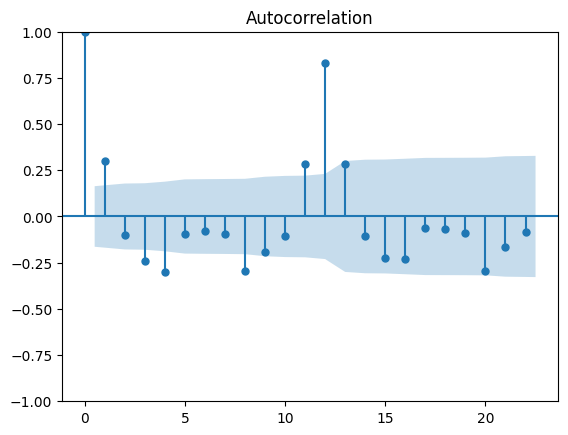

In [18]:
plot_acf(data1)
plt.show()

In [19]:
# ADfuller Test to check stationary 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data1.Passengers, autolag="AIC")
print(dftest)
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations Used for ADF Regression and critical values Calculation: ", dftest[3])
print("5. Critical Values : ", dftest[4])
# p-value<0.05 or ADF < Critical values --> data is stationary

(-2.8292668241699945, 0.05421329028382621, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
1. ADF :  -2.8292668241699945
2. P-value :  0.05421329028382621
3. Num of Lags :  12
4. Num of Observations Used for ADF Regression and critical values Calculation:  130
5. Critical Values :  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


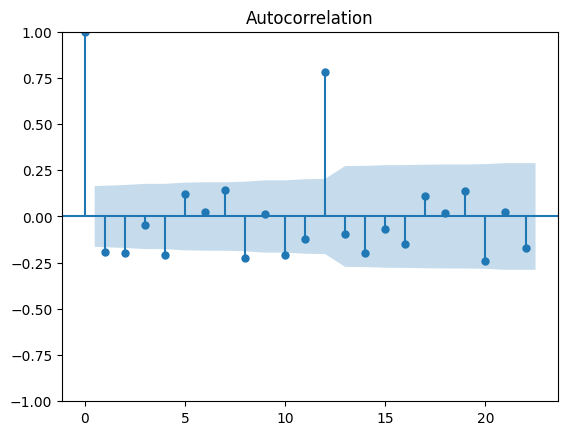

In [20]:
data2 = data1.diff()
data2 = data2.iloc[1:]
plot_acf(data2)
plt.show()

In [21]:
# ADfuller Test to check stationary 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data2.Passengers, autolag="AIC") # Akaike Information criteria
print(dftest)
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations Used for ADF Regression and critical values Calculation: ", dftest[3])
print("5. Critical Values : ", dftest[4])
# p-value<0.05 or ADF < Critical values --> data is stationary

(-16.38423154246852, 2.732891850014085e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.6020417275614)
1. ADF :  -16.38423154246852
2. P-value :  2.732891850014085e-29
3. Num of Lags :  11
4. Num of Observations Used for ADF Regression and critical values Calculation:  130
5. Critical Values :  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [22]:
# Creating trainining and test sets
train = data2[:100] #from 0th row to 99th row - training data
test = data2[100:] #from 100th row to 141 - testing data

In [23]:
train.shape

(100, 1)

In [24]:
test.shape

(42, 1)

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Lag Selection
from statsmodels.tsa.ar_model import ar_select_order, AutoReg
mod = ar_select_order(data2, maxlag =15, glob=True)
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
# model creation
ar_model = AutoReg(train, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ar_model_fit = ar_model.fit() # training the model

In [28]:
# making prediction
prediction = ar_model_fit.predict(start=100, end=141)
prediction

1957-07-01   -26.325761
1957-08-01   -51.184110
1957-09-01   -43.959992
1957-10-01    -6.363909
1957-11-01    24.061033
1957-12-01    75.324375
1958-01-01   -30.525575
1958-02-01   -20.698153
1958-03-01    67.089284
1958-04-01   -56.564573
1958-05-01    13.377346
1958-06-01    66.337091
1958-07-01   -33.772981
1958-08-01   -58.228155
1958-09-01   -45.055018
1958-10-01   -14.690154
1958-11-01    35.370293
1958-12-01    80.696719
1959-01-01   -34.541873
1959-02-01   -19.600193
1959-03-01    67.142411
1959-04-01   -51.386197
1959-05-01    14.330762
1959-06-01    71.079740
1959-07-01   -41.567386
1959-08-01   -66.313619
1959-09-01   -47.008369
1959-10-01   -22.589679
1959-11-01    46.865050
1959-12-01    87.112502
1960-01-01   -38.965689
1960-02-01   -18.788673
1960-03-01    68.371352
1960-04-01   -46.488704
1960-05-01    17.168608
1960-06-01    74.840922
1960-07-01   -50.438749
1960-08-01   -75.197337
1960-09-01   -50.102526
1960-10-01   -29.954777
1960-11-01    58.602494
1960-12-01    94

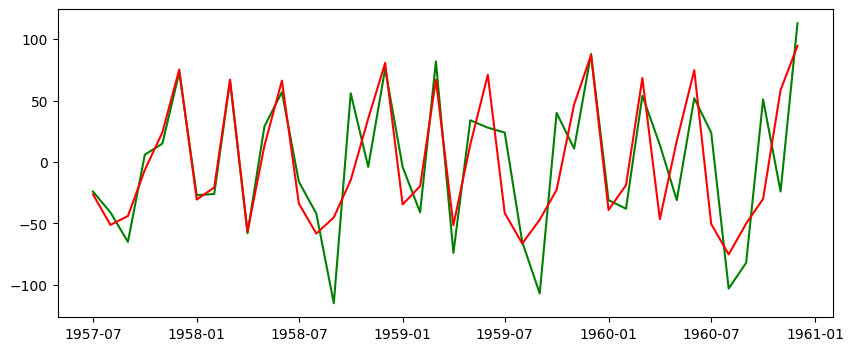

In [29]:
plt.figure(figsize=(10,4))
plt.plot(test, color="g")
plt.plot(prediction, color="r")
plt.show()

In [30]:
import numpy as np
from sklearn.metrics import *
mse = mean_squared_error(prediction, test)
mae = mean_absolute_error(prediction, test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1401.54266331652
28.0913087762084
37.437182897709064


# ARIMA

In [32]:
# 
from statsmodels.tsa.arima.model import ARIMA


In [33]:
# Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,3,5)) # order --i.e p,d,q
model_arima_fit = model_arima.fit() #training

In [34]:
# evaluate the model
print(model_arima_fit.aic)

958.9990760546079


In [35]:
test

,Passengers
Month,
1957-07-01,-24.0
1957-08-01,-41.0
1957-09-01,-65.0
1957-10-01,6.0
1957-11-01,15.0
1957-12-01,73.0
1958-01-01,-27.0
1958-02-01,-26.0
1958-03-01,66.0


In [36]:
import itertools

In [37]:
# tqd

In [38]:
from tqdm import tqdm # tqdm is used to handle infinite loops and long running operations
p=d=q= range(5)
pdq = list(itertools.product(p,d,q))
aic = []
for i in tqdm(pdq):
    try:
        model = ARIMA(train, order=i)
        model_fit = model.fit()
        aic.append(model_fit.aic)
        print(i, model_fit.aic)
    except:
        pdq.remove(i)

  0%|                                                                                          | 0/125 [00:00<?, ?it/s]

(0, 0, 0) 967.9135518309452


  2%|█▎                                                                                | 2/125 [00:00<00:51,  2.40it/s]

(0, 0, 1) 931.4372807013035


  2%|█▉                                                                                | 3/125 [00:01<01:20,  1.51it/s]

(0, 0, 2) 925.7296649741488


  3%|██▌                                                                               | 4/125 [00:03<02:02,  1.01s/it]

(0, 0, 3) 920.9009364031103


  4%|███▎                                                                              | 5/125 [00:05<02:51,  1.43s/it]

(0, 0, 4) 912.6569693524705
(0, 1, 0) 1046.731900142016


  6%|████▌                                                                             | 7/125 [00:06<01:36,  1.22it/s]

(0, 1, 1) 963.8739376073069


  6%|█████▏                                                                            | 8/125 [00:06<01:29,  1.31it/s]

(0, 1, 2) 933.2129822075693


  7%|█████▉                                                                            | 9/125 [00:08<01:48,  1.07it/s]

(0, 1, 3) 926.5735313528435


  8%|██████▍                                                                          | 10/125 [00:10<02:29,  1.30s/it]

(0, 1, 4) 924.3111219363518
(0, 2, 0) 1143.9983209809495


 10%|███████▊                                                                         | 12/125 [00:10<01:31,  1.23it/s]

(0, 2, 1) 1043.757058536763


 10%|████████▍                                                                        | 13/125 [00:11<01:29,  1.26it/s]

(0, 2, 2) 966.1634154307807


 11%|█████████                                                                        | 14/125 [00:12<01:47,  1.03it/s]

(0, 2, 3) 941.6123899614746


 12%|█████████▋                                                                       | 15/125 [00:15<02:36,  1.42s/it]

(0, 2, 4) 933.7559567068553
(0, 3, 0) 1247.20709797673


 14%|███████████                                                                      | 17/125 [00:16<01:39,  1.08it/s]

(0, 3, 1) 1139.8659454126864


 14%|███████████▋                                                                     | 18/125 [00:16<01:26,  1.24it/s]

(0, 3, 2) 1044.6471541476685


 15%|████████████▎                                                                    | 19/125 [00:17<01:33,  1.13it/s]

(0, 3, 3) 972.3661728806509


 16%|████████████▉                                                                    | 20/125 [00:18<01:39,  1.05it/s]

(0, 3, 4) 957.9182180434386
(0, 4, 0) 1351.0676097034006


 18%|██████████████▎                                                                  | 22/125 [00:19<01:03,  1.62it/s]

(0, 4, 1) 1241.6050826087176


 18%|██████████████▉                                                                  | 23/125 [00:20<01:09,  1.47it/s]

(0, 4, 2) 1139.202366555273


 19%|███████████████▌                                                                 | 24/125 [00:21<01:24,  1.20it/s]

(0, 4, 3) 1048.6657001031494


 21%|████████████████▊                                                                | 26/125 [00:22<01:09,  1.43it/s]

(0, 4, 4) 987.5754302040252
(1, 0, 0) 963.0127961450421


 22%|█████████████████▍                                                               | 27/125 [00:23<01:14,  1.31it/s]

(1, 0, 1) 928.7077562813934


 22%|██████████████████▏                                                              | 28/125 [00:25<01:34,  1.03it/s]

(1, 0, 2) 919.8685616751236


 23%|██████████████████▊                                                              | 29/125 [00:27<02:10,  1.36s/it]

(1, 0, 3) 921.8388137160692


 24%|███████████████████▍                                                             | 30/125 [00:29<02:25,  1.53s/it]

(1, 0, 4) 923.3886062428087
(1, 1, 0) 1021.0396389673771


 26%|████████████████████▋                                                            | 32/125 [00:30<01:33,  1.01s/it]

(1, 1, 1) 959.4979673062229


 26%|█████████████████████▍                                                           | 33/125 [00:30<01:28,  1.04it/s]

(1, 1, 2) 962.9514176587383


 27%|██████████████████████                                                           | 34/125 [00:32<01:46,  1.16s/it]

(1, 1, 3) 923.226342131246


 28%|██████████████████████▋                                                          | 35/125 [00:34<02:09,  1.44s/it]

(1, 1, 4) 923.1013273060672
(1, 2, 0) 1098.8738469116902


 30%|███████████████████████▉                                                         | 37/125 [00:35<01:20,  1.09it/s]

(1, 2, 1) 1019.121801551979


 30%|████████████████████████▌                                                        | 38/125 [00:36<01:27,  1.01s/it]

(1, 2, 2) 962.4936327626555


 31%|█████████████████████████▎                                                       | 39/125 [00:38<01:44,  1.22s/it]

(1, 2, 3) 965.1462528555433


 32%|█████████████████████████▉                                                       | 40/125 [00:41<02:32,  1.79s/it]

(1, 2, 4) 931.2348331574037
(1, 3, 0) 1186.5053670162915


 34%|███████████████████████████▏                                                     | 42/125 [00:42<01:34,  1.14s/it]

(1, 3, 1) 1096.1395155147582


 34%|███████████████████████████▊                                                     | 43/125 [00:43<01:29,  1.09s/it]

(1, 3, 2) 1021.3161932844155


 35%|████████████████████████████▌                                                    | 44/125 [00:44<01:28,  1.09s/it]

(1, 3, 3) 1048.4438466864835


 36%|█████████████████████████████▏                                                   | 45/125 [00:46<01:49,  1.37s/it]

(1, 3, 4) 971.1998703323145
(1, 4, 0) 1279.6340971682


 38%|██████████████████████████████▍                                                  | 47/125 [00:47<01:10,  1.11it/s]

(1, 4, 1) 1182.441514594966


 38%|███████████████████████████████                                                  | 48/125 [00:48<01:11,  1.07it/s]

(1, 4, 2) 1096.907659444262


 39%|███████████████████████████████▊                                                 | 49/125 [00:50<01:30,  1.19s/it]

(1, 4, 3) 1141.7606652490724


 40%|████████████████████████████████▍                                                | 50/125 [00:53<02:11,  1.75s/it]

(1, 4, 4) 1050.0994475502698


 41%|█████████████████████████████████                                                | 51/125 [00:54<01:47,  1.45s/it]

(2, 0, 0) 951.2134496277066


 42%|█████████████████████████████████▋                                               | 52/125 [00:54<01:32,  1.27s/it]

(2, 0, 1) 926.7745524279997


 42%|██████████████████████████████████▎                                              | 53/125 [00:57<01:50,  1.54s/it]

(2, 0, 2) 921.8449127885956


 43%|██████████████████████████████████▉                                              | 54/125 [00:59<02:00,  1.69s/it]

(2, 0, 3) 923.4339327750404


 44%|███████████████████████████████████▋                                             | 55/125 [01:01<02:11,  1.88s/it]

(2, 0, 4) 907.3464150090633


 45%|████████████████████████████████████▎                                            | 56/125 [01:01<01:38,  1.42s/it]

(2, 1, 0) 987.8554910217135


 46%|████████████████████████████████████▉                                            | 57/125 [01:02<01:17,  1.14s/it]

(2, 1, 1) 948.4595247229526


 46%|█████████████████████████████████████▌                                           | 58/125 [01:03<01:18,  1.17s/it]

(2, 1, 2) 948.207290813524


 47%|██████████████████████████████████████▏                                          | 59/125 [01:05<01:30,  1.37s/it]

(2, 1, 3) 924.3432831797227


 48%|██████████████████████████████████████▉                                          | 60/125 [01:08<01:57,  1.80s/it]

(2, 1, 4) 920.4699557113454


 49%|███████████████████████████████████████▌                                         | 61/125 [01:08<01:28,  1.39s/it]

(2, 2, 0) 1042.4341331127505


 50%|████████████████████████████████████████▏                                        | 62/125 [01:09<01:11,  1.14s/it]

(2, 2, 1) 987.1969170571432


 50%|████████████████████████████████████████▊                                        | 63/125 [01:11<01:31,  1.48s/it]

(2, 2, 2) 952.5016157652344


 51%|█████████████████████████████████████████▍                                       | 64/125 [01:13<01:48,  1.78s/it]

(2, 2, 3) 955.5751879266015


 52%|██████████████████████████████████████████                                       | 65/125 [01:16<02:08,  2.14s/it]

(2, 2, 4) 961.3103163255286


 53%|██████████████████████████████████████████▊                                      | 66/125 [01:17<01:36,  1.63s/it]

(2, 3, 0) 1112.0638834732426


 54%|███████████████████████████████████████████▍                                     | 67/125 [01:17<01:16,  1.31s/it]

(2, 3, 1) 1041.3775809347617


 54%|████████████████████████████████████████████                                     | 68/125 [01:20<01:31,  1.61s/it]

(2, 3, 2) 991.008502336318


 55%|████████████████████████████████████████████▋                                    | 69/125 [01:22<01:45,  1.89s/it]

(2, 3, 3) 960.9209538514306


 56%|█████████████████████████████████████████████▎                                   | 70/125 [01:26<02:10,  2.36s/it]

(2, 3, 4) 963.0556857347094


 57%|██████████████████████████████████████████████                                   | 71/125 [01:26<01:36,  1.78s/it]

(2, 4, 0) 1192.610973120054


 58%|██████████████████████████████████████████████▋                                  | 72/125 [01:27<01:16,  1.44s/it]

(2, 4, 1) 1109.871335000072


 58%|███████████████████████████████████████████████▎                                 | 73/125 [01:29<01:29,  1.71s/it]

(2, 4, 2) 1044.127352051074


 59%|███████████████████████████████████████████████▉                                 | 74/125 [01:32<01:43,  2.03s/it]

(2, 4, 3) 998.3864653387266


 60%|████████████████████████████████████████████████▌                                | 75/125 [01:35<01:52,  2.25s/it]

(2, 4, 4) 1017.8943342279193


 61%|█████████████████████████████████████████████████▏                               | 76/125 [01:35<01:28,  1.82s/it]

(3, 0, 0) 953.1213128116476


 62%|█████████████████████████████████████████████████▉                               | 77/125 [01:37<01:16,  1.59s/it]

(3, 0, 1) 928.7783158604699


 62%|██████████████████████████████████████████████████▌                              | 78/125 [01:38<01:16,  1.64s/it]

(3, 0, 2) 923.5861503662014


 63%|███████████████████████████████████████████████████▏                             | 79/125 [01:41<01:33,  2.02s/it]

(3, 0, 3) 925.4068400391719


 64%|███████████████████████████████████████████████████▊                             | 80/125 [01:45<01:48,  2.42s/it]

(3, 0, 4) 908.9397111795514


 65%|████████████████████████████████████████████████████▍                            | 81/125 [01:45<01:21,  1.85s/it]

(3, 1, 0) 988.1270457402825


 66%|█████████████████████████████████████████████████████▏                           | 82/125 [01:46<01:05,  1.52s/it]

(3, 1, 1) 950.4173558521493


 66%|█████████████████████████████████████████████████████▊                           | 83/125 [01:47<01:02,  1.48s/it]

(3, 1, 2) 947.4292748100953


 67%|██████████████████████████████████████████████████████▍                          | 84/125 [01:50<01:11,  1.74s/it]

(3, 1, 3) 925.6993667246805


 68%|███████████████████████████████████████████████████████                          | 85/125 [01:52<01:16,  1.92s/it]

(3, 1, 4) 917.3603874800848


 69%|███████████████████████████████████████████████████████▋                         | 86/125 [01:52<00:58,  1.50s/it]

(3, 2, 0) 1035.9653947027343


 70%|████████████████████████████████████████████████████████▍                        | 87/125 [01:53<00:47,  1.25s/it]

(3, 2, 1) 987.7213009078333


 70%|█████████████████████████████████████████████████████████                        | 88/125 [01:54<00:46,  1.26s/it]

(3, 2, 2) 988.3429756396364


 71%|█████████████████████████████████████████████████████████▋                       | 89/125 [01:57<01:00,  1.68s/it]

(3, 2, 3) 951.6950537585676


 72%|██████████████████████████████████████████████████████████▎                      | 90/125 [02:00<01:17,  2.20s/it]

(3, 2, 4) 956.1130000416782


 73%|██████████████████████████████████████████████████████████▉                      | 91/125 [02:01<00:58,  1.71s/it]

(3, 3, 0) 1092.0403291467849


 74%|███████████████████████████████████████████████████████████▌                     | 92/125 [02:02<00:47,  1.43s/it]

(3, 3, 1) 1035.4895473745225


 74%|████████████████████████████████████████████████████████████▎                    | 93/125 [02:04<00:54,  1.69s/it]

(3, 3, 2) 991.8397875764846


 75%|████████████████████████████████████████████████████████████▉                    | 94/125 [02:07<01:03,  2.06s/it]

(3, 3, 3) 992.1758487061072


 76%|█████████████████████████████████████████████████████████████▌                   | 95/125 [02:10<01:11,  2.40s/it]

(3, 3, 4) 960.0280561711639


 77%|██████████████████████████████████████████████████████████████▏                  | 96/125 [02:11<00:53,  1.85s/it]

(3, 4, 0) 1157.4666167735681


 78%|██████████████████████████████████████████████████████████████▊                  | 97/125 [02:13<00:54,  1.95s/it]

(3, 4, 1) 1090.8329224889785


 78%|███████████████████████████████████████████████████████████████▌                 | 98/125 [02:15<00:53,  1.98s/it]

(3, 4, 2) 1038.9356892255164


 79%|████████████████████████████████████████████████████████████████▏                | 99/125 [02:18<00:56,  2.18s/it]

(3, 4, 3) 1046.4817014819457


 80%|████████████████████████████████████████████████████████████████                | 100/125 [02:20<00:54,  2.18s/it]

(3, 4, 4) 999.4104391337789


 81%|████████████████████████████████████████████████████████████████▋               | 101/125 [02:21<00:43,  1.82s/it]

(4, 0, 0) 938.2795905978065


 82%|█████████████████████████████████████████████████████████████████▎              | 102/125 [02:22<00:38,  1.66s/it]

(4, 0, 1) 918.287911821365


 82%|█████████████████████████████████████████████████████████████████▉              | 103/125 [02:25<00:42,  1.95s/it]

(4, 0, 2) 919.7069506567664


 83%|██████████████████████████████████████████████████████████████████▌             | 104/125 [02:28<00:49,  2.38s/it]

(4, 0, 3) 904.9118012167919


 84%|███████████████████████████████████████████████████████████████████▏            | 105/125 [02:31<00:52,  2.62s/it]

(4, 0, 4) 906.8299718059225


 85%|███████████████████████████████████████████████████████████████████▊            | 106/125 [02:32<00:38,  2.01s/it]

(4, 1, 0) 975.7694853871915


 86%|████████████████████████████████████████████████████████████████████▍           | 107/125 [02:33<00:30,  1.67s/it]

(4, 1, 1) 936.4163375317012


 86%|█████████████████████████████████████████████████████████████████████           | 108/125 [02:36<00:35,  2.07s/it]

(4, 1, 2) 920.956835380234


 87%|█████████████████████████████████████████████████████████████████████▊          | 109/125 [02:39<00:41,  2.56s/it]

(4, 1, 3) 923.6481875554066


 88%|██████████████████████████████████████████████████████████████████████▍         | 110/125 [02:43<00:41,  2.77s/it]

(4, 1, 4) 920.2434097507245


 89%|███████████████████████████████████████████████████████████████████████         | 111/125 [02:43<00:29,  2.13s/it]

(4, 2, 0) 1026.568020670787


 90%|███████████████████████████████████████████████████████████████████████▋        | 112/125 [02:44<00:23,  1.77s/it]

(4, 2, 1) 976.1403584524555


 90%|████████████████████████████████████████████████████████████████████████▎       | 113/125 [02:48<00:26,  2.21s/it]

(4, 2, 2) 941.5077078324772


 91%|████████████████████████████████████████████████████████████████████████▉       | 114/125 [02:50<00:26,  2.42s/it]

(4, 2, 3) 979.4298977269706


 92%|█████████████████████████████████████████████████████████████████████████▌      | 115/125 [02:54<00:28,  2.84s/it]

(4, 2, 4) 961.3146917773885


 93%|██████████████████████████████████████████████████████████████████████████▏     | 116/125 [02:55<00:19,  2.20s/it]

(4, 3, 0) 1078.605739953936


 94%|██████████████████████████████████████████████████████████████████████████▉     | 117/125 [02:56<00:14,  1.81s/it]

(4, 3, 1) 1026.7742645187977


 94%|███████████████████████████████████████████████████████████████████████████▌    | 118/125 [02:59<00:14,  2.10s/it]

(4, 3, 2) 981.2317519223021


 95%|████████████████████████████████████████████████████████████████████████████▏   | 119/125 [03:01<00:13,  2.31s/it]

(4, 3, 3) 1028.3799605452891


 96%|████████████████████████████████████████████████████████████████████████████▊   | 120/125 [03:05<00:13,  2.63s/it]

(4, 3, 4) 986.8364581328545


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 121/125 [03:06<00:08,  2.05s/it]

(4, 4, 0) 1132.880784668297


 98%|██████████████████████████████████████████████████████████████████████████████  | 122/125 [03:07<00:05,  1.80s/it]

(4, 4, 1) 1078.2001450524454


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 123/125 [03:09<00:04,  2.06s/it]

(4, 4, 2) 1030.92896805436


 99%|███████████████████████████████████████████████████████████████████████████████▎| 124/125 [03:12<00:02,  2.35s/it]

(4, 4, 3) 1037.2406618325085


100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [03:15<00:00,  1.56s/it]

(4, 4, 4) 999.1191483262804


In [79]:
import numpy as np
np.argmin(aic)

103

In [81]:
pdq[np.argmin(aic)]

(4, 0, 3)

In [83]:
train

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1957-02-01,-23.0
1957-03-01,69.0
1957-04-01,-63.0


In [93]:
# create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4,0,3))

model_arima_fit = model_arima.fit() #training

In [97]:
forecast25 = model_arima_fit.forecast(steps=25)

In [99]:
forecast25

1957-07-01   -51.878352
1957-08-01   -22.750434
1957-09-01    22.964728
1957-10-01   -22.794355
1957-11-01     5.528798
1957-12-01    28.125066
1958-01-01   -28.701672
1958-02-01    -0.724803
1958-03-01    26.553866
1958-04-01   -26.049819
1958-05-01     0.238322
1958-06-01    25.937270
1958-07-01   -25.482662
1958-08-01    -0.260159
1958-09-01    25.247121
1958-10-01   -24.469338
1958-11-01    -0.444338
1958-12-01    24.568335
1959-01-01   -23.596566
1959-02-01    -0.672781
1959-03-01    23.911427
1959-04-01   -22.729413
1959-05-01    -0.875428
1959-06-01    23.267642
1959-07-01   -21.896943
Freq: MS, Name: predicted_mean, dtype: float64

In [103]:
forecast100 = model_arima_fit.forecast(steps=100)
forecast100

1957-07-01   -51.878352
1957-08-01   -22.750434
1957-09-01    22.964728
1957-10-01   -22.794355
1957-11-01     5.528798
                ...    
1965-06-01    11.785212
1965-07-01    -8.621879
1965-08-01    -2.895111
1965-09-01    11.444436
1965-10-01    -8.279489
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

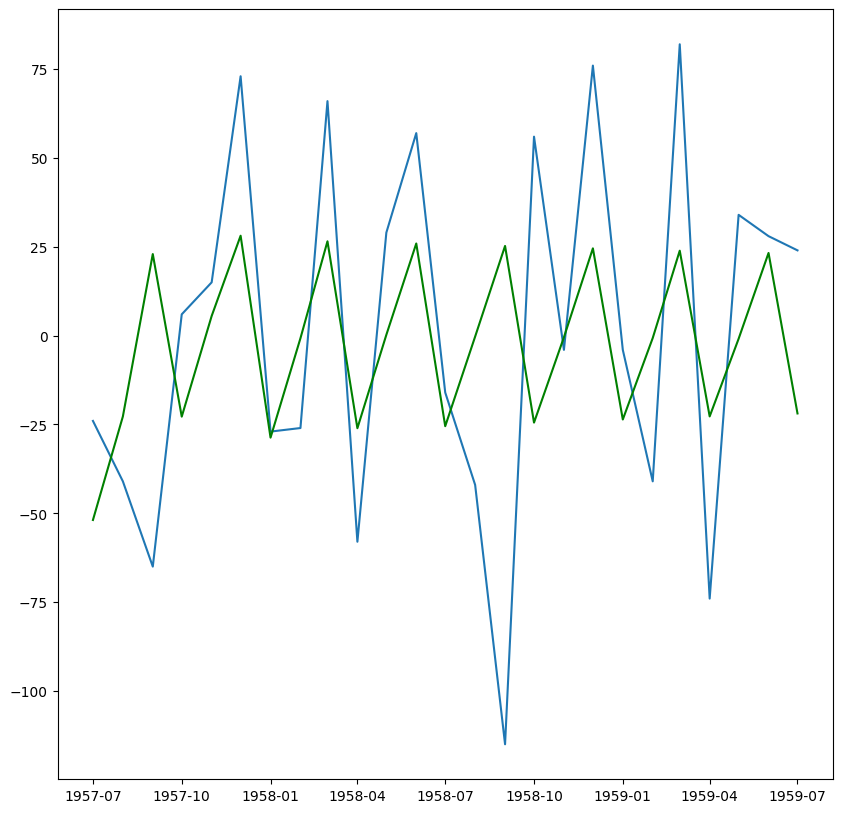

In [109]:
# Comparison of actual vs predicted for 25 values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(test[:25])
plt.plot(forecast25, color="green") #line plot for prediction

In [111]:
test[0:25]

,Passengers
Month,
1957-07-01,-24.0
1957-08-01,-41.0
1957-09-01,-65.0
1957-10-01,6.0
1957-11-01,15.0
1957-12-01,73.0
1958-01-01,-27.0
1958-02-01,-26.0
1958-03-01,66.0


In [113]:
test1 = test[0:25].values.flatten()
test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

In [119]:
# 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25)) # 1st method

# Calculate mean squared error
mean_sq_error = mean_squared_error(test1, forecast25)
mean_abs_error = mean_absolute_error(test1, forecast25)
root_mean_sq_error = np.sqrt(mean_sq_error) #2nd method

print(mean_sq_error)
print(mean_abs_error)
print(root_mean_sq_error)

48.49096411630316
2351.373600928601
38.28578772302119
48.49096411630316
